<a href="https://colab.research.google.com/github/girotodenis/python/blob/master/RelatorioTesteCarga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
%%capture

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt   
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline  

py.init_notebook_mode(connected=False)

In [192]:
df = pd.read_csv('/content/epol-teste-consultas-menu.csv')
#df1 = pd.read_csv('/content/epol-teste-consultas-menu4x3000_1.csv')
#df2 = pd.read_csv('/content/epol-teste-consultas-menu4x3000_2.csv')
#df3 = pd.read_csv('/content/epol-teste-consultas-menu4x3000_3.csv')
#df4 = pd.read_csv('/content/epol-teste-consultas-menu4x3000_4.csv')
#df = pd.concat([df1, df2, df3, df4])

df.success.astype(str)
df.success.replace('False','false')
df.success.replace('f','false')
df.success.replace('True	','true	')
df.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3,7) have mixed types.Specify dtype option on import or set low_memory=False.



Index(['timeStamp', 'elapsed', 'label', 'responseCode', 'responseMessage',
       'threadName', 'dataType', 'success', 'failureMessage', 'bytes',
       'sentBytes', 'grpThreads', 'allThreads', 'URL', 'Latency', 'IdleTime',
       'Connect'],
      dtype='object')

In [193]:
print(df.shape)
df.head(1)

(275321, 17)


,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1638967532852,4196,Login,200,OK,Thread Group 1-106,text,True,NaN,3652.0,467.0,203.0,203.0,https://sistemashom.dpf.gov.br/auth/realms/sis...,4195.0,0.0,3910.0


In [194]:
df2 = df.groupby(['success']).size().reset_index(name='counts')
df2.head()

,success,counts
0,False,21948
1,True,240196
2,f,1
3,false,2650
4,true,10526


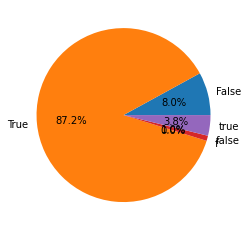

In [195]:

#explode = (0,0.2)
#plt.pie(x=df2.counts, labels=df2.success,explode=explode, autopct='%1.1f%%')
plt.pie(x=df2.counts, labels=df2.success, autopct='%1.1f%%')
plt.show()

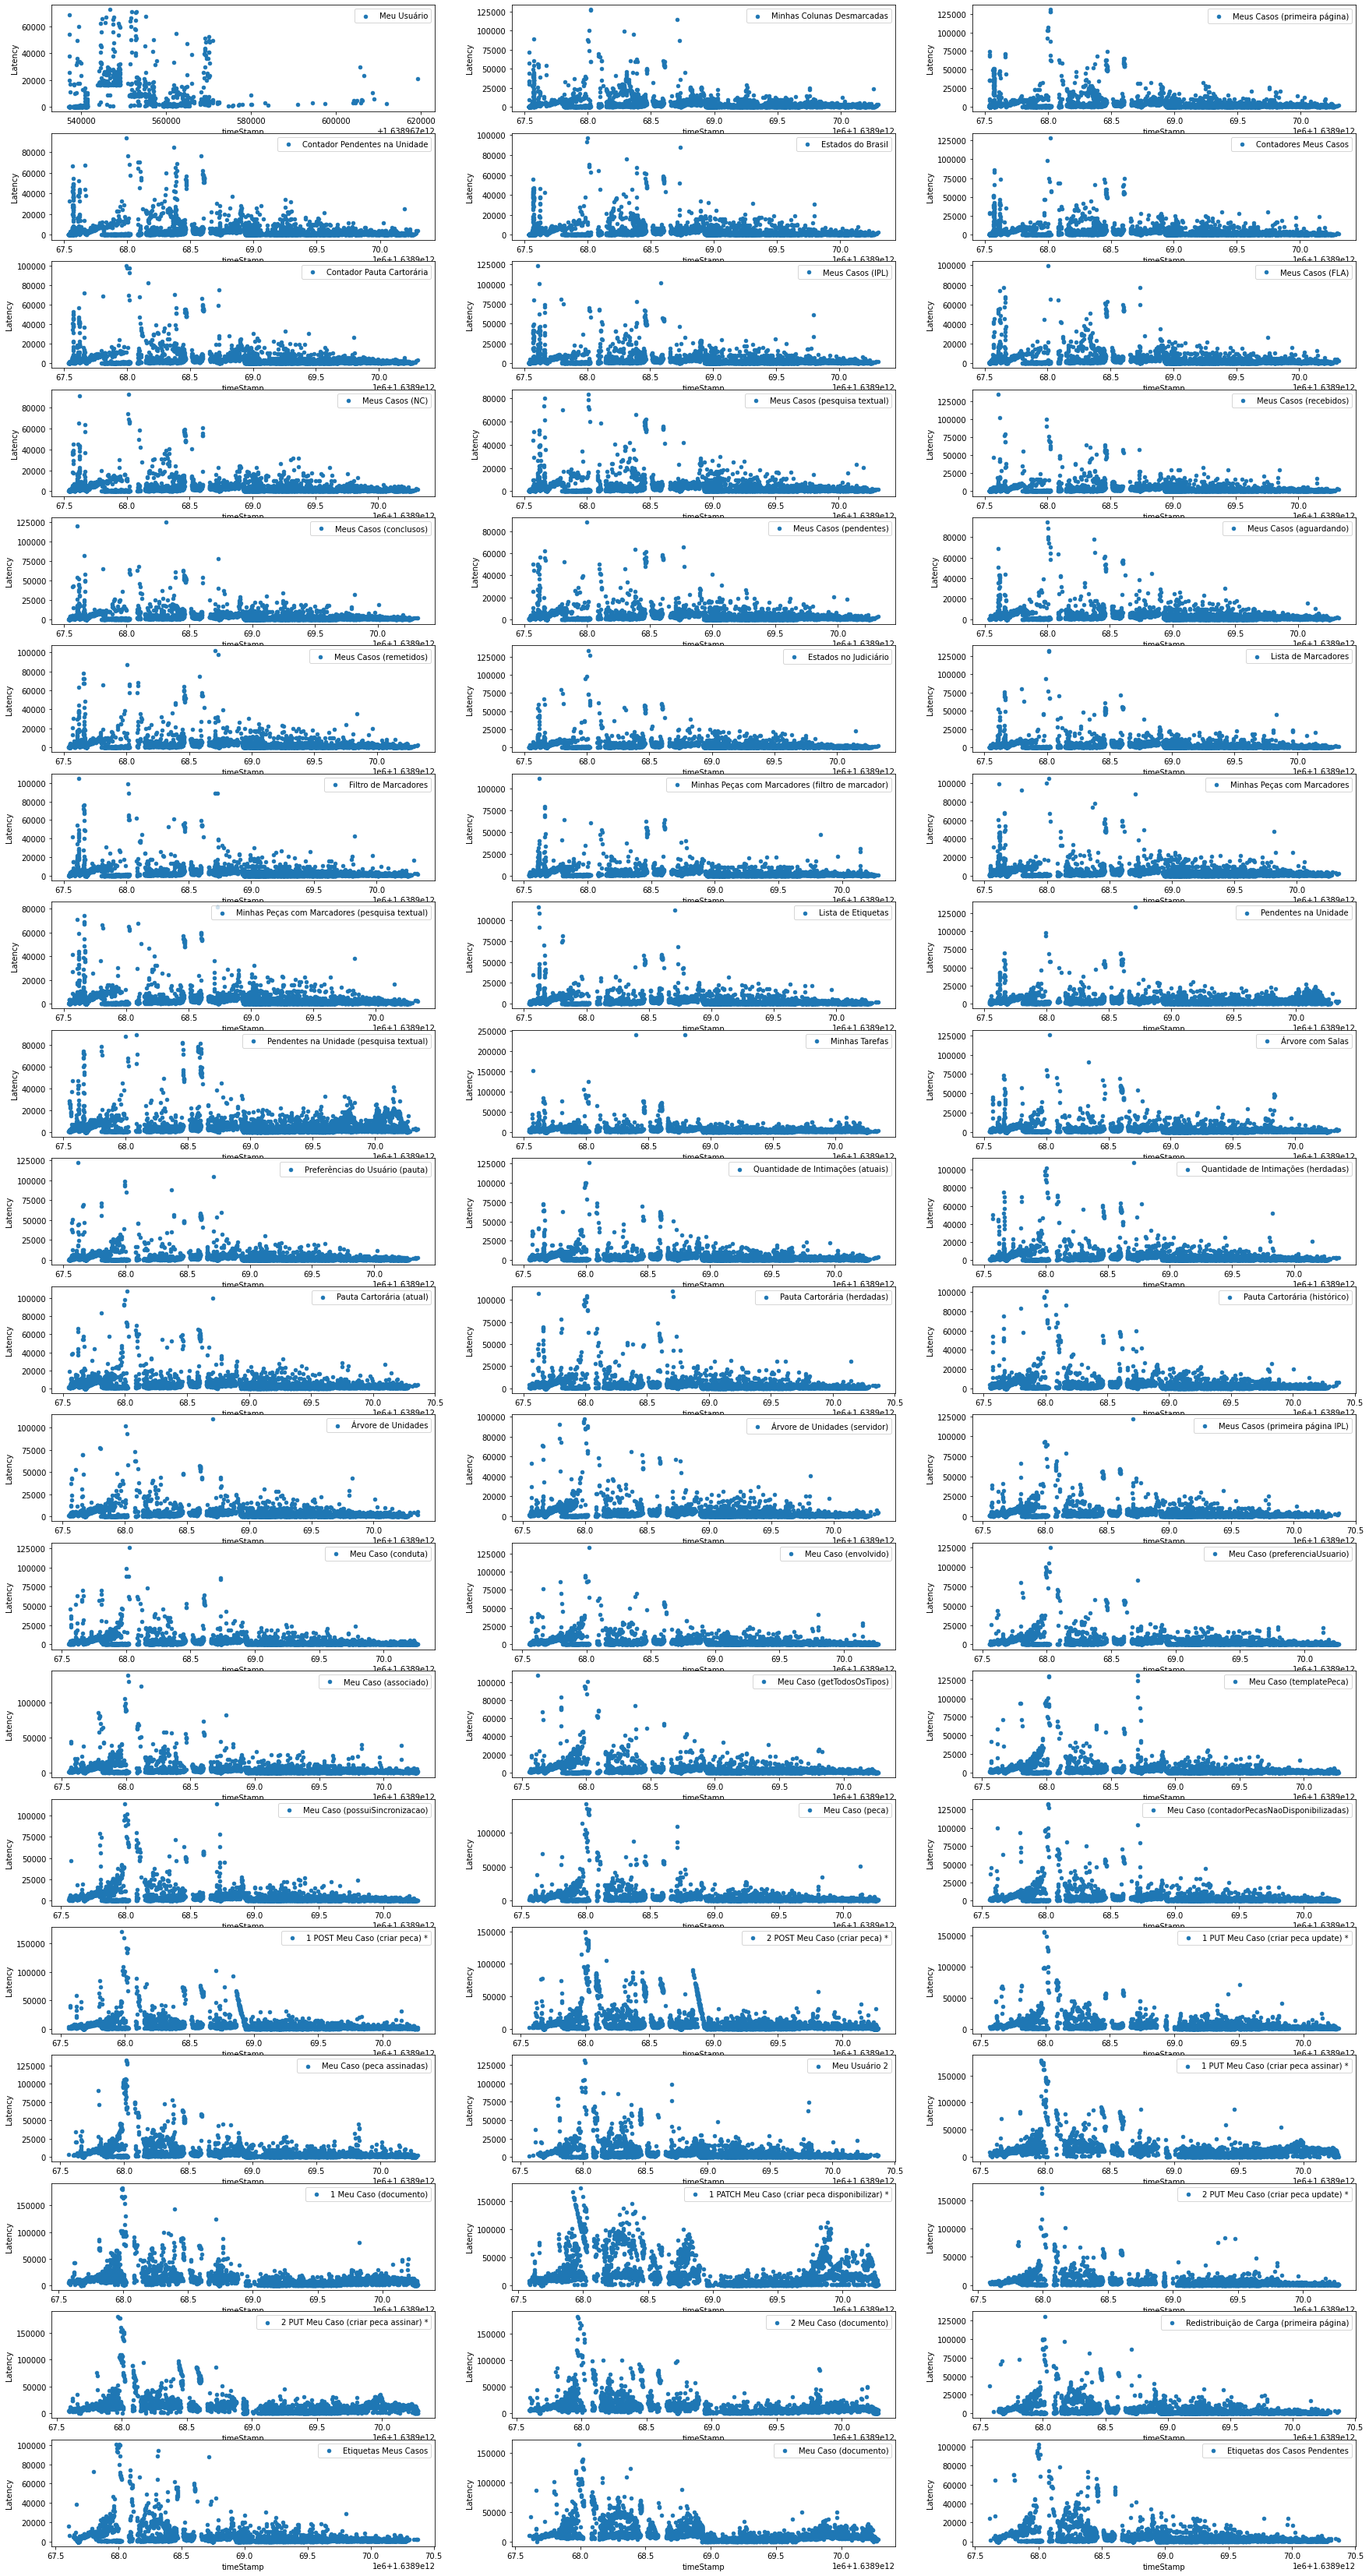

In [196]:
#amostra.plot.line(x="timeStamp", y="Latency", title=label)
nrow=20
ncol=3
fig, axes = plt.subplots(nrow, ncol, figsize=(30,60))

count=1
#df[df['label']==df.label.unique()[count]].plot(ax=axes[0,0], kind='line', x='timeStamp', y='Latency', label=df.label.unique()[count])
for r in range(nrow):
    for c in range(ncol):
          df[df['label']==df.label.unique()[count]].plot(ax=axes[r,c], kind='scatter', x='timeStamp', y='Latency', label=df.label.unique()[count])
          #df[df['label']==df.label.unique()[count]].plot(ax=axes[r,c], kind='line', x='timeStamp', y='Latency', label=df.label.unique()[count])
          count+=1
        
#fig, ax = plt.subplots(figsize=(10,5))
#for key, grp in amostra.groupby(['label']):
#    ax = grp.plot(ax=ax, kind='line', x='timeStamp', y='Latency', label=key)
#plt.legend(loc='best')
#plt.show()

In [197]:
#fig, ax = plt.subplots(figsize=(20,10))
#for key, grp in amostra.groupby(['label']):
#    ax = grp.plot(ax=ax, kind='scatter', x='timeStamp',c=np.random.rand(len(value_list),), y='Latency',marker="s", label=key)
#plt.legend(loc='best')
#plt.show()

In [198]:
df1 = pd.read_csv('/content/epol-teste-consultas-menu4x3000_1.csv')
df2 = pd.read_csv('/content/epol-teste-consultas-menu4x3000_2.csv')
df3 = pd.read_csv('/content/epol-teste-consultas-menu4x3000_3.csv')
df4 = pd.read_csv('/content/epol-teste-consultas-menu4x3000_4.csv')
df = pd.concat([df1, df2, df3, df4])

df.success.astype(str)
df.success.replace('False','false')
df.success.replace('f','false')
df.success.replace('True	','true	')
df.columns

Index(['timeStamp', 'elapsed', 'label', 'responseCode', 'responseMessage',
       'threadName', 'dataType', 'success', 'failureMessage', 'bytes',
       'sentBytes', 'grpThreads', 'allThreads', 'URL', 'Latency', 'IdleTime',
       'Connect'],
      dtype='object')

In [199]:
print(df.shape)
df.head(1)

(263379, 17)


,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1638976443709,6730,Login,Non HTTP response code: javax.net.ssl.SSLExcep...,Non HTTP response message: Connection reset,Thread Group 1-119,text,False,Test failed: text expected to contain /access_...,3959,0,186,186,https://sistemashom.dpf.gov.br/auth/realms/sis...,0.0,0.0,6729.0


In [200]:
df2 = df.groupby(['success']).size().reset_index(name='counts')
df2.head()

,success,counts
0,False,32336
1,True,231043


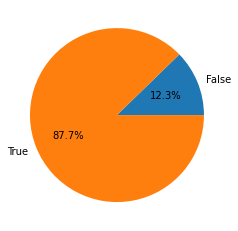

In [201]:
plt.pie(x=df2.counts, labels=df2.success, autopct='%1.1f%%')
plt.show()

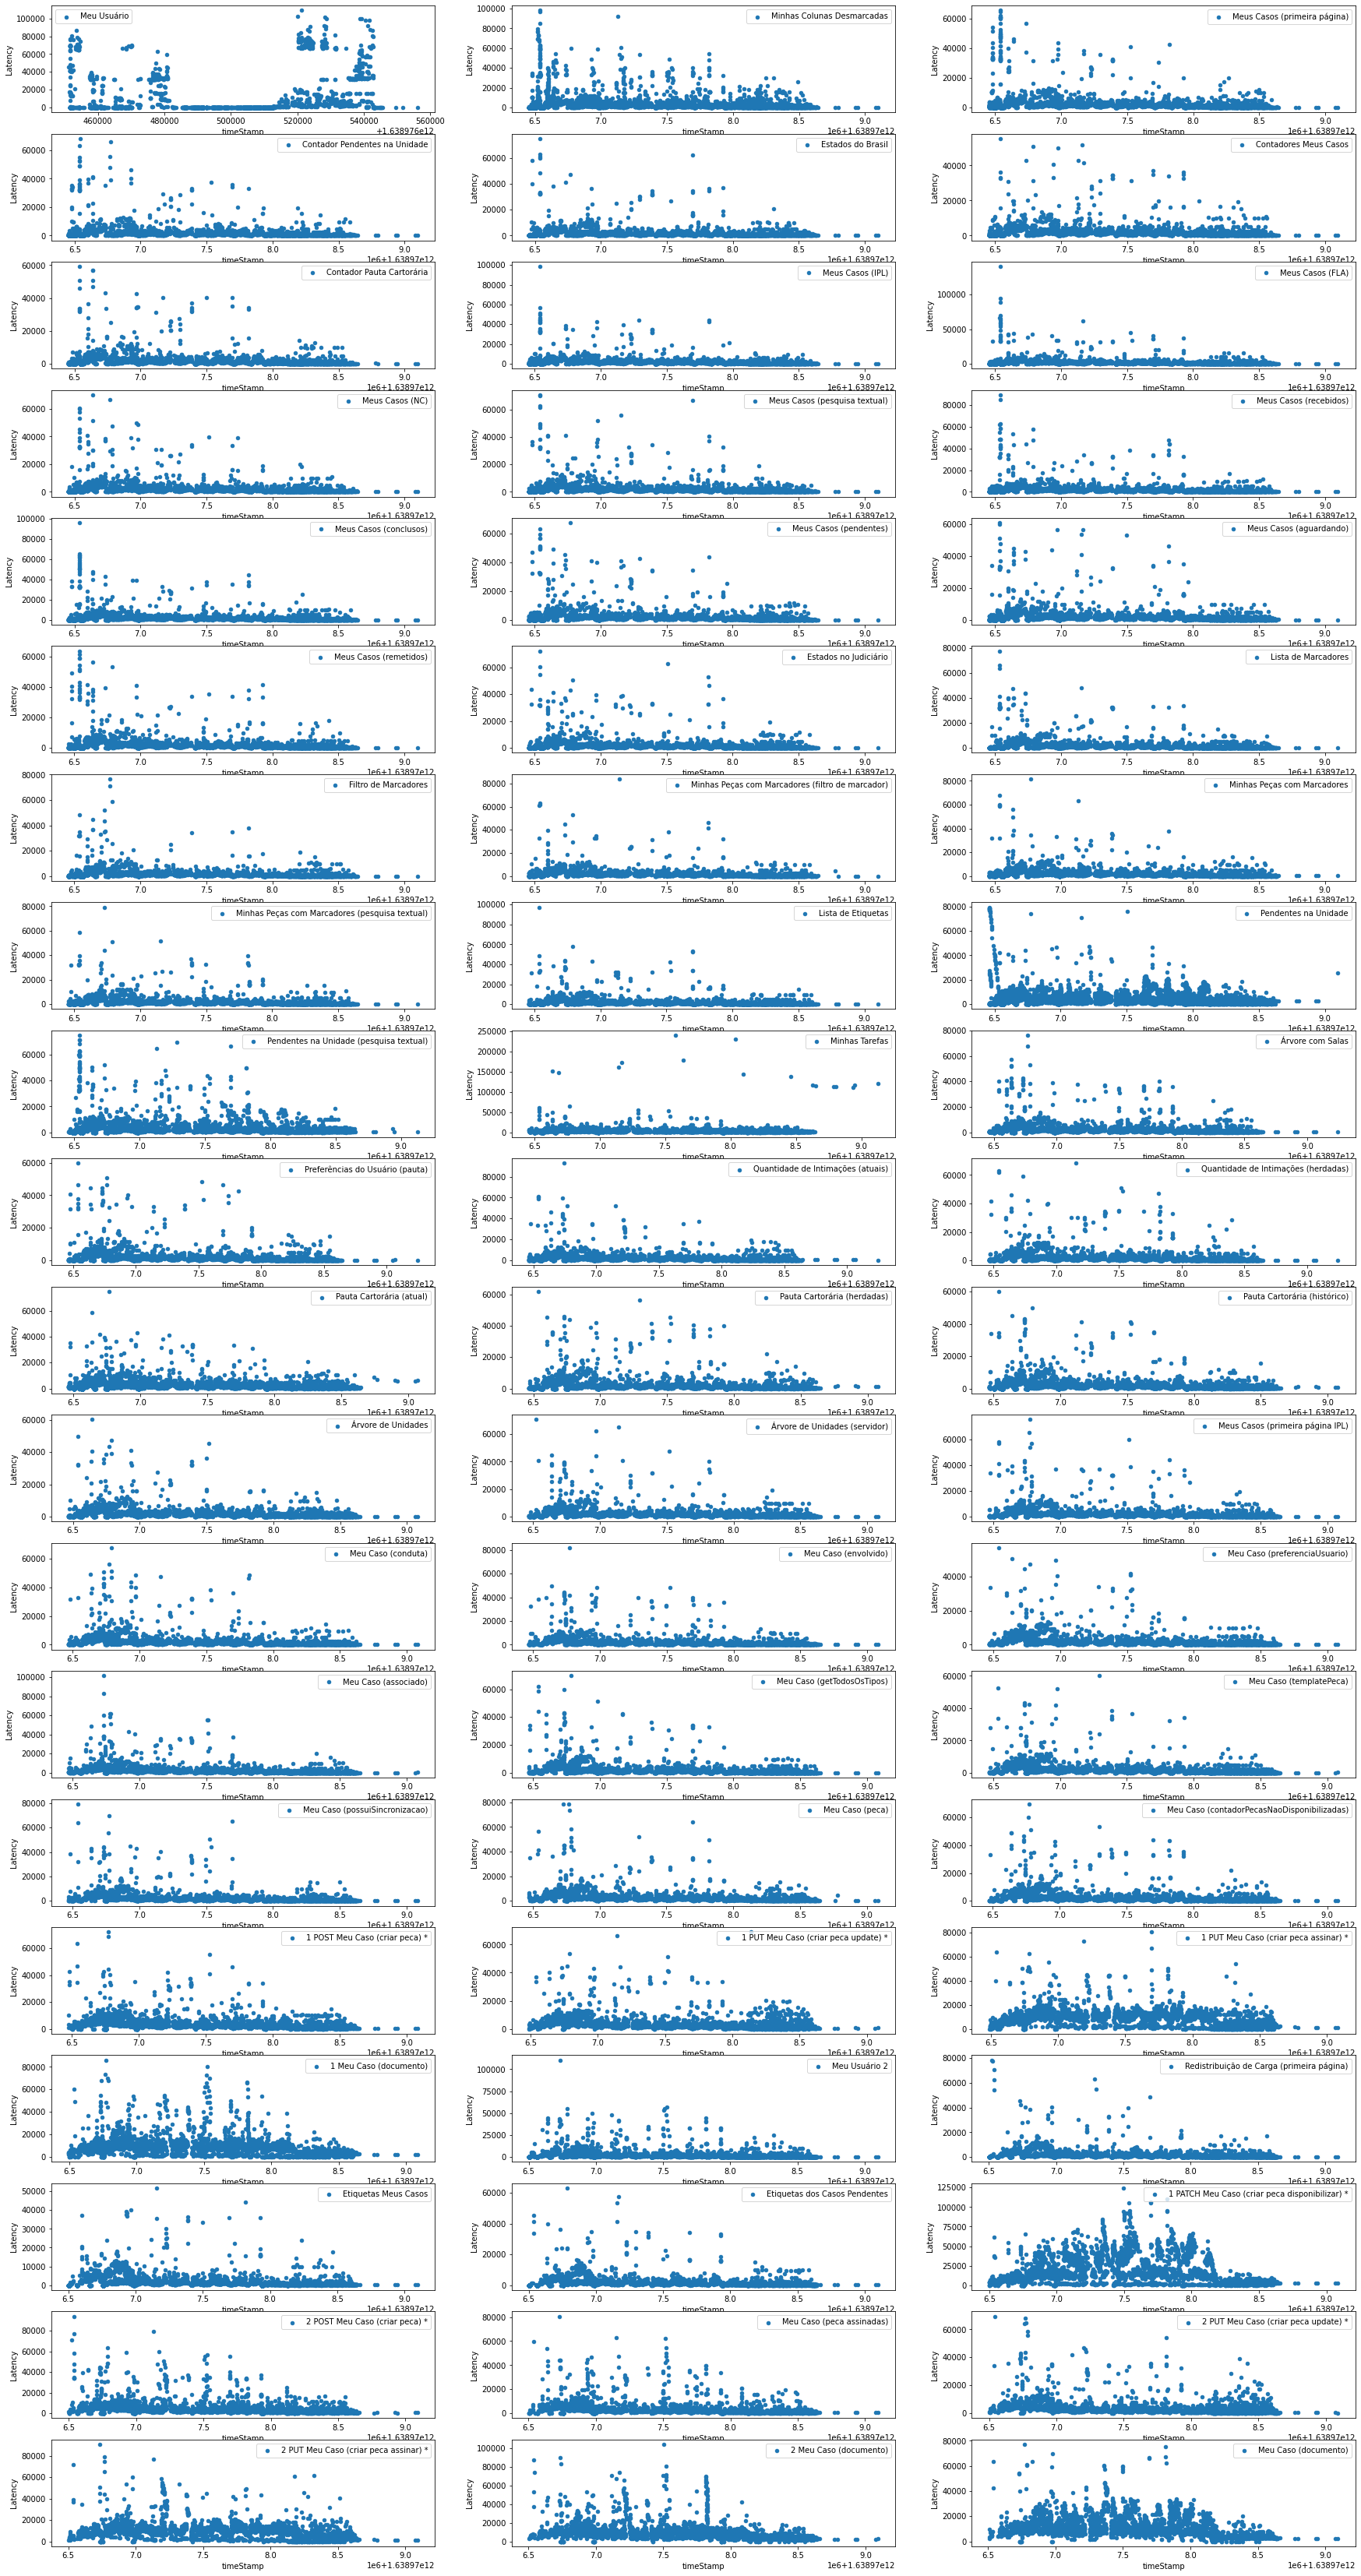

In [202]:
nrow=20
ncol=3
fig, axes = plt.subplots(nrow, ncol, figsize=(30,60))

count=1
for r in range(nrow):
    for c in range(ncol):
          df[df['label']==df.label.unique()[count]].plot(ax=axes[r,c], kind='scatter', x='timeStamp', y='Latency', label=df.label.unique()[count])
          #df[df['label']==df.label.unique()[count]].plot(ax=axes[r,c], kind='line', x='timeStamp', y='Latency', label=df.label.unique()[count])
          count+=1